<a href="https://colab.research.google.com/github/brenoslivio/SME0828_DataScience/blob/master/Projects/3%20-%20Classifica%C3%A7%C3%A3o/Projeto3_Classificacao_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SME0828 - Introdução à Ciência de Dados
# Projeto 3: Classificação 

### Alunos

Aline Fernanda da Conceição, Nº USP: 9437275

Breno Lívio Silva de Almeida, Nº USP: 10276675

Matheus Victal Cerqueira, Nº USP: 10276661

***Universidade de São Paulo, São Carlos, Brasil.***

## Exercícios sugeridos para a atividade avaliativa 3

Os seguintes exercícios foram sugeridos para entrega em 03 de novembro de 2020 para a disciplina SME0828 - Ciência de Dados oferecida pelo Instituto de Ciências Matemáticas e de Computação (ICMC) da Universidade de São Paulo (USP), a qual foi ministrada pelo professor Francisco Aparecido Rodrigues. Vamos trabalhar com o conjunto de dados [*Star dataset to predict star types*](https://www.kaggle.com/deepu1109/star-dataset). O dataset tem várias informações sobre características de estrelas como temperatura absoluta, luminosidade relativa, tipos de estrelas, entre outros. Vamos classificar os dados considerando vários classificadores conhecidos.



---



## Sumário

1. Desenvolvimento

  1.1 [Exercício 1](#ex1)

  1.2 [Exercício 2](#ex2)

  1.3 [Exercício 3](#ex3)

  1.4 [Exercício 4](#ex4)

  1.5 [Exercício 5](#ex5)

  1.6 [Exercício 6](#ex6)
  
  1.7 [Exercício 7](#ex7)



---



## Desenvolvimento

### <a name="ex5"></a> 5 - Gere dois conjuntos de pontos em duas dimensões usando o código a seguir:

```
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
n = 500
c = [(1,1), (10,10)] #center of the points
std = [5.0, 2] # standard deviation
nc = [400,50] #number of points in each class
X, y = make_blobs(n_samples=n, n_features=2, cluster_std=std,centers= c)
plt.scatter(X[:,0],X[:,1], c=y)
plt.show(True)
```
### Compare os classificadores Naive Bayes e Bayesiano Paramétrico variando a separação entre as nuvens de pontos – mantenha a posição de uma classe fixa e mude a posição do centro da outra classe, calculando a distância entre os centros.


Para desenvolvimento do exercício, primeiramente importamos as bibliotecas necessárias

In [58]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import multivariate_normal

Vamos usar o método make_blobs já variando e plottando no gráfico os conjuntos gerados variando o centro, além de mostrar a acurácia para o Naive Bayes e Bayesiano Paramétrico.

#### Naive Bayes

In [59]:
def naive_bayes(x_train, x_test, y_train, y_test):
    from sklearn.naive_bayes import GaussianNB
    from sklearn import metrics

    model = GaussianNB()
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    score = accuracy_score(y_pred, y_test)
    
    return score

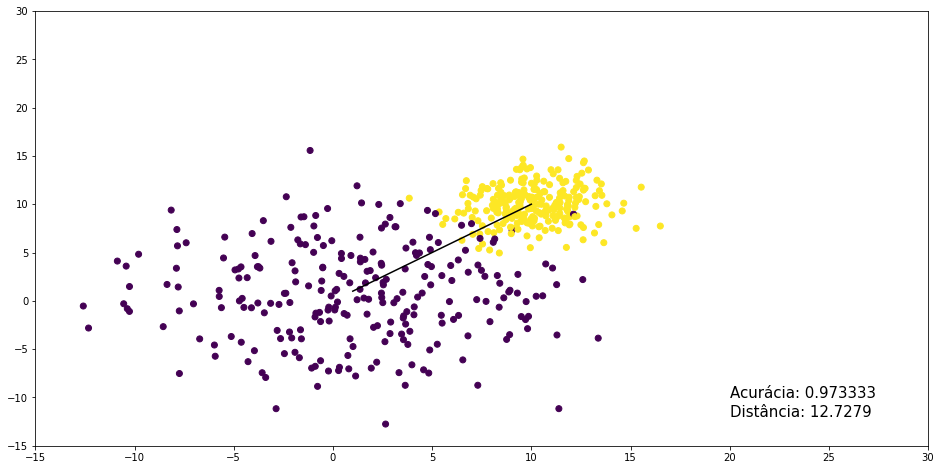

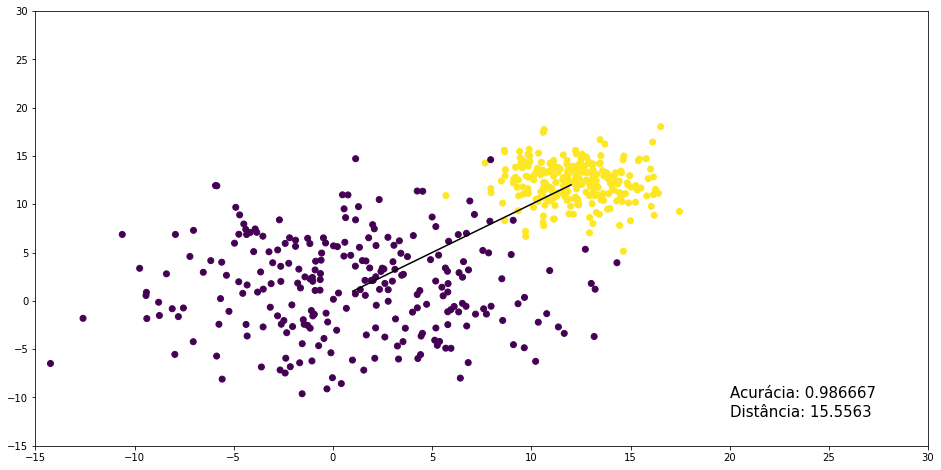

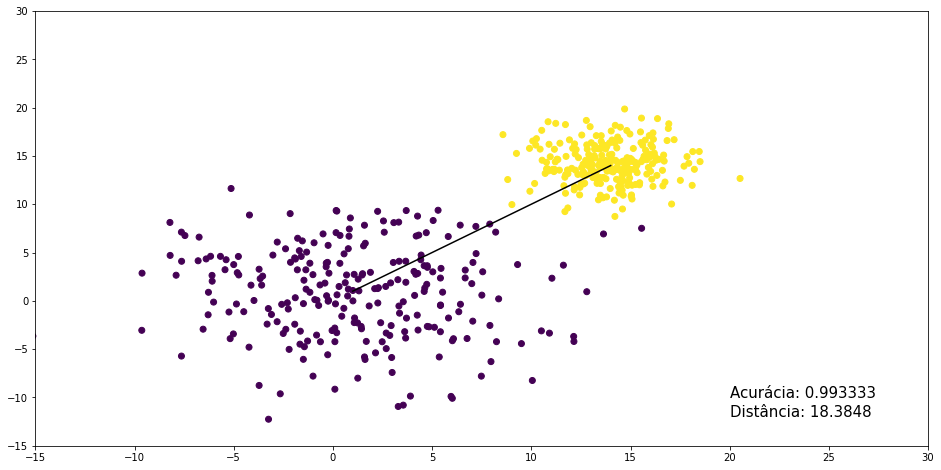

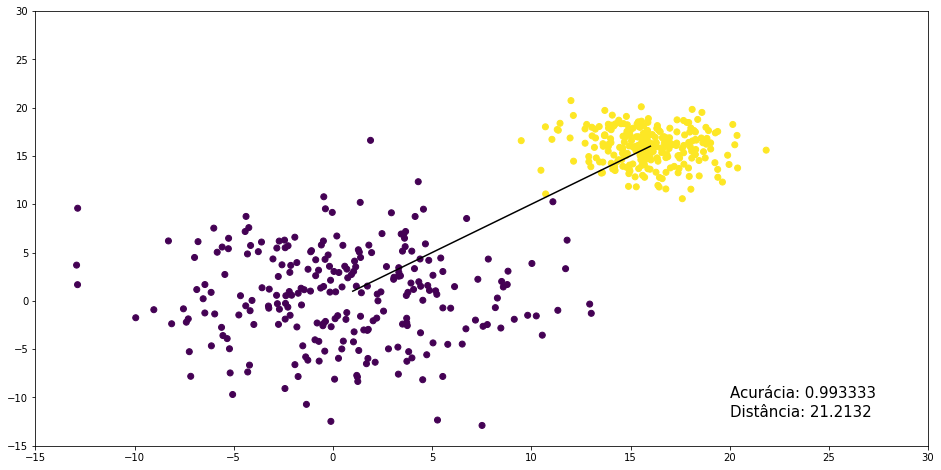

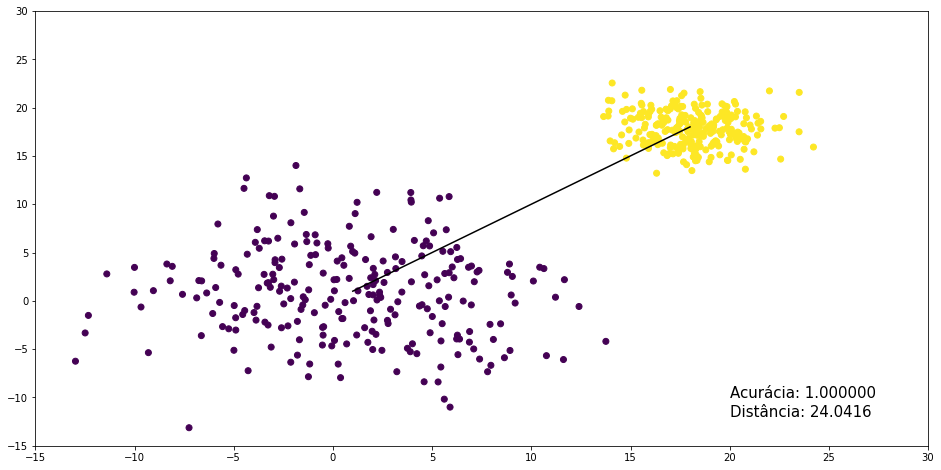

In [99]:
for i in np.arange(start = 0, stop = 10, step = 2):
    plt.figure(figsize=(16,8))
    n = 500
    c = [(1,1), (10+i,10+i)] #centro dos pontos
    std = [5.0, 2] # desvio padrão
    nc = [400,50] #número de pontos em cada classe
    X, y = make_blobs(n_samples = n, n_features = 2, cluster_std = std, centers = c)
    scaler = StandardScaler().fit(X) #padronizar os dados
    X_norm = scaler.transform(X)
    p = 0.7

    plt.plot([c[0][0], 10 + i], [c[0][1], 10 + i],'k-')

    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, train_size = p, random_state = 25) #Seleciona os conjuntos de treinamento e teste

    stringScore = 'Acurácia: {0:.6f}'.format(naive_bayes(X_train, X_test, y_train, y_test))
    plt.text(20, -10, stringScore, fontsize=15)

    stringScore = 'Distância: {0:.4f}'.format(np.linalg.norm(np.array(c[1]) - np.array(c[0])))
    plt.text(20, -12, stringScore, fontsize=15)

    plt.xlim(-15, 30)
    plt.ylim(-15, 30)

    plt.scatter(X[:,0], X[:,1], c = y)
    plt.show(True)

#### Bayesiano Paramétrico

In [90]:
def bayes_parametrico(x_train, x_test, y_train, y_test, classes):
    # Declaração para a matriz que irá armazenar as probabilidades para cada classe

    P = pd.DataFrame(data=np.zeros((x_train.shape[0], len(classes))), columns = classes) 

    # (Repare que tal matriz apresenta o mesmo número de linhas que x_train e o número de classes como número de 
    # colunas, assim poderá armazenar a probabilidade de cada ponto observado pertencer a classe 0 ou 1)

    Pc = np.zeros(len(classes)) # Armazenamento da fração de elementos em cada classe (no caso, é um vetor 1x2)

    for i in np.arange(0, len(classes)): # Iteração no número de classes
        elem = tuple(np.where(y_trfor i in np.arange(start = 0, stop = 10, step = 2):ain == classes[i])) # Obtenção de tupla correspondente à freq de elem da classe i
        Pc[i] = len(elem)/len(y_train) # Probabilidade de pertencer a classe i (no caso, 0 ou 1)
        Z = x_train[elem,:][0] # Elementos presentes no conjunto de treinamento
        m = np.mean(Z, axis = 0) # Vetor de médias
        cv = np.cov(np.transpose(Z)) # Matriz de variâncias e covariâncias
        for j in np.arange(0,x_test.shape[0]): # Iteração para as observações no conjunto de teste
            x = x_test[j,:]
            # Obtenção da probabilidade de pertencer a cada classe (conjunto teste)
            pj = multivariate_normal.pdf(x, mean=m, cov=cv, allow_singular=True) # Modelagem em uma distribuição
            # normal multivariada (Classificador Bayesiano Paramétrico)
            P[classes[i]][j] = pj*Pc[i] # posteriori proporcional a verossimilhança x priori (Teorema de Bayes)

    y_pred = [] # Declaração do vetor que irá armazenar as classes preditas 
    for i in np.arange(0, x_test.shape[0]): # Iteração em len(número de colunas de x_test)
        c = np.argmax(np.array(P.iloc[[i]])) # Identificador (encontra a probabilidade a posteriori com maior valor)
        y_pred.append(classes[c]) # Classificador (classifica os dados de x_test)

    # Obtenção da acurácia
    score = accuracy_score(y_pred, y_test) #Obtém a acurácia do classificador 
    
    return score

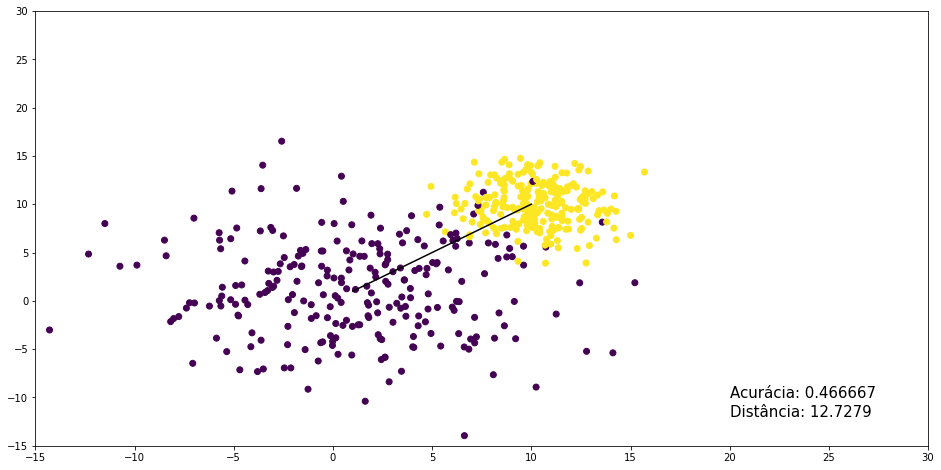

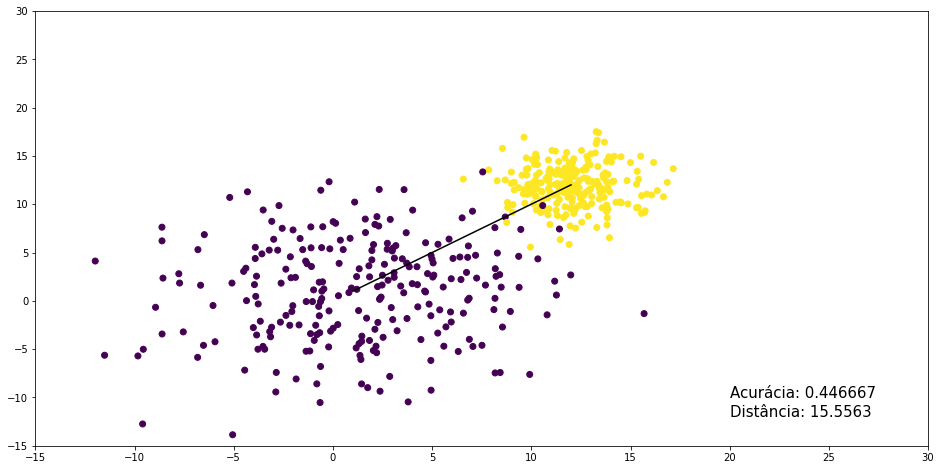

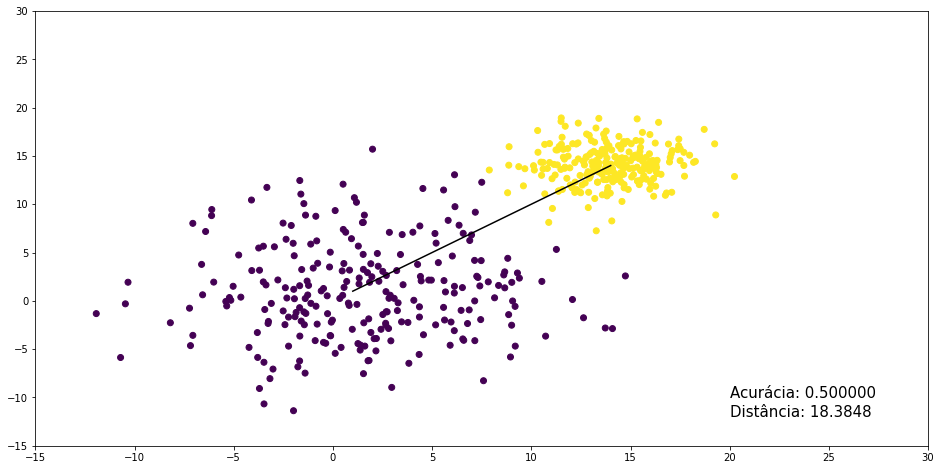

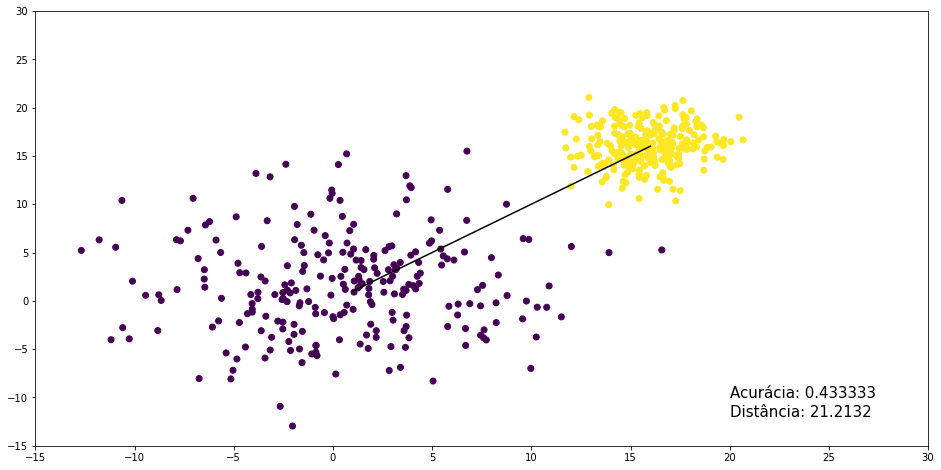

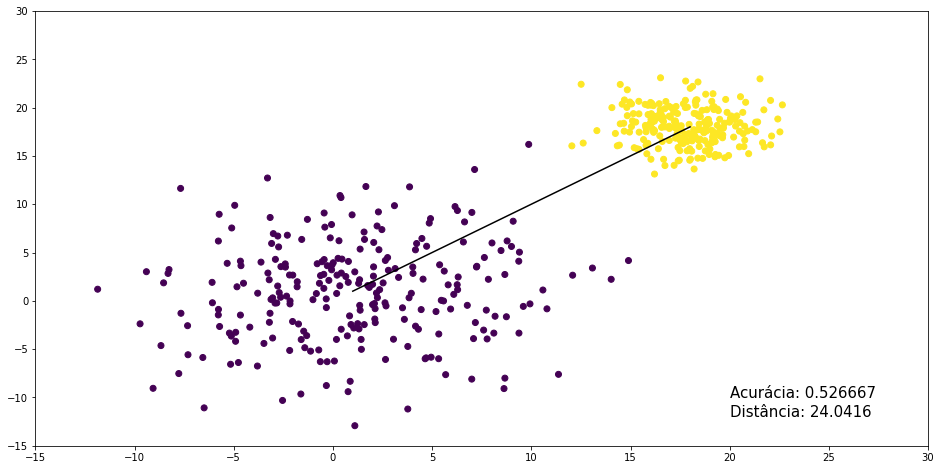

In [100]:
for i in np.arange(start = 0, stop = 10, step = 2):
    plt.figure(figsize=(16,8))
    n = 500
    c = [(1,1), (10+i,10+i)] #centro dos pontos
    std = [5.0, 2] # desvio padrão
    nc = [400,50] #número de pontos em cada classe
    X, y = make_blobs(n_samples = n, n_features = 2, cluster_std = std, centers = c)
    scaler = StandardScaler().fit(X) #padronizar os dados
    X_norm = scaler.transform(X)
    p = 0.7

    plt.plot([c[0][0], 10 + i], [c[0][1], 10 + i],'k-')

    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, train_size = p, random_state = 25) #Seleciona os conjuntos de treinamento e teste

    stringScore = 'Acurácia: {0:.6f}'.format(bayes_parametrico(X_train, X_test, y_train, y_test, y))
    plt.text(20, -10, stringScore, fontsize=15)

    stringScore = 'Distância: {0:.4f}'.format(np.linalg.norm(np.array(c[1]) - np.array(c[0])))
    plt.text(20, -12, stringScore, fontsize=15)

    plt.xlim(-15, 30)
    plt.ylim(-15, 30)

    plt.scatter(X[:,0], X[:,1], c = y)
    plt.show(True)

### <a name="ex6"></a> 6 - Gere dois conjuntos de pontos em duas dimensões usando o código a seguir:

```
from sklearn import datasets
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
n_samples = 1000
data  = datasets.make_moons(n_samples=n_samples, noise=.05)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap=’viridis’, s=50, alpha=0.7)
plt.show(True)
```
### Compare os classificadores Naive Bayes, k-vizinhos mais próximos e regressão logística variando o nível de ruído (noise) no intervalo [0,1]. No caso do algoritmo k-vizinho, mostre os resultados para diferentes valores de k.


Primeiramente, importamos todas as bibliotecas necessárias para a gerar, preparar e realizar as acurácias para posteriormente serem analisados e comparados todos os modelos:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

Assim como no exercício 3, os dados utilizados foram gerados pelo método make_moons.
Utilizando o código sugerido inicialmente como base temos: 

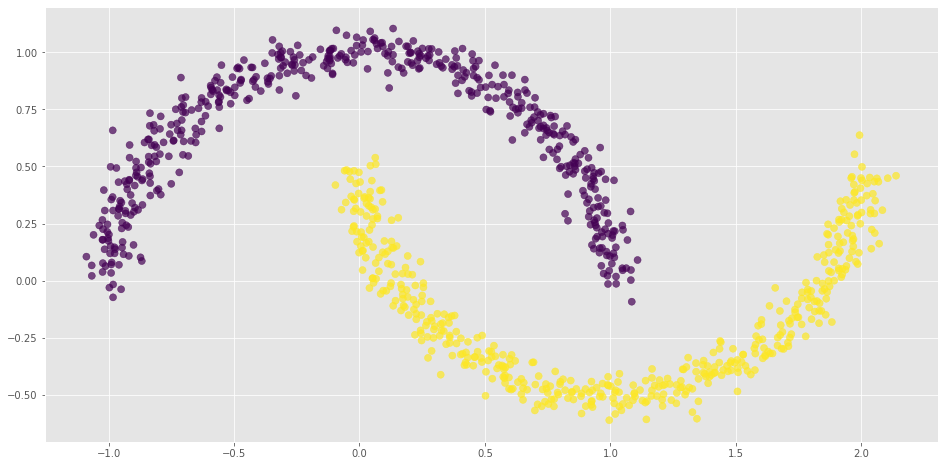

In [12]:
plt.figure(figsize=(16,8))
n_samples = 1000
data  = datasets.make_moons(n_samples=n_samples, noise=0.05)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)

Como é 

In [4]:
#gerar os dados
n_samples = 1000
noise = np.arange(0,1,0.01)
score1 = [] 
for i in noise:
    np.random.seed(50)
    data = datasets.make_moons(n_samples=n_samples, noise=i)
    X = data[0]
    y = data[1]
    scaler = StandardScaler().fit(X) #padronizar os dados
    X = scaler.transform(X)
    p = 0.7 
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 25) #Seleciona os conjuntos de treinamento e teste
    model = GaussianNB() #Ajusta o classificador Naive-Bayes de acordo com os dados
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test) # Predicao
    score1.append(accuracy_score(y_pred, y_test)) #Calcula a acuracia

Agora faremos o procedimento para ajustar o modelo k-vizinhos

In [5]:
#gerando os dados
n_samples = 1000
noise = np.arange(0,1,0.01)
score2 = []

In [6]:
for i in noise:
    np.random.seed(50)
    data = datasets.make_moons(n_samples=n_samples, noise=i)
    X = data[0]
    y = data[1]
    scaler = StandardScaler().fit(X) #normalizando os dados
    X = scaler.transform(X)
    p = 0.7
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 25)
    model = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')# ajusta o modelo k-vizinhos
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)  # faz a predição no conjunto de teste
    score2.append(accuracy_score(y_pred, y_test)) # verifica a acurácia da predicao

Do mesmo modo vamos verificar o modelo para a Regressão Logística

In [7]:
n_samples = 1000
score3 = []
noise = np.arange(0,1,0.01)

In [8]:
for i in noise:
    np.random.seed(50)
    data = datasets.make_moons(n_samples=n_samples, noise=i)
    X = data[0]
    y = data[1]
    classes = np.array(pd.unique(y), dtype=int) 
    p = 0.7
    x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 50)

    model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score3.append(model.score(x_test, y_test))

In [9]:
print("Acurácia Naive Bayes: Máxima:",np.max(score1)," Mínima:",np.min(score1))
print("Acurácia K-vizinhos: Máxima:",np.max(score2)," Acurácia Mínima:",np.min(score2))
print("Acurácia Regressão Logística: Máxima:",np.max(score3)," Acurácia Mínima:",np.min(score3))

Acurácia Naive Bayes: Máxima: 0.8733333333333333  Mínima: 0.7033333333333334
Acurácia K-vizinhos: Máxima: 1.0  Acurácia Mínima: 0.59
Acurácia Regressão Logística: Máxima: 0.8866666666666667  Acurácia Mínima: 0.7


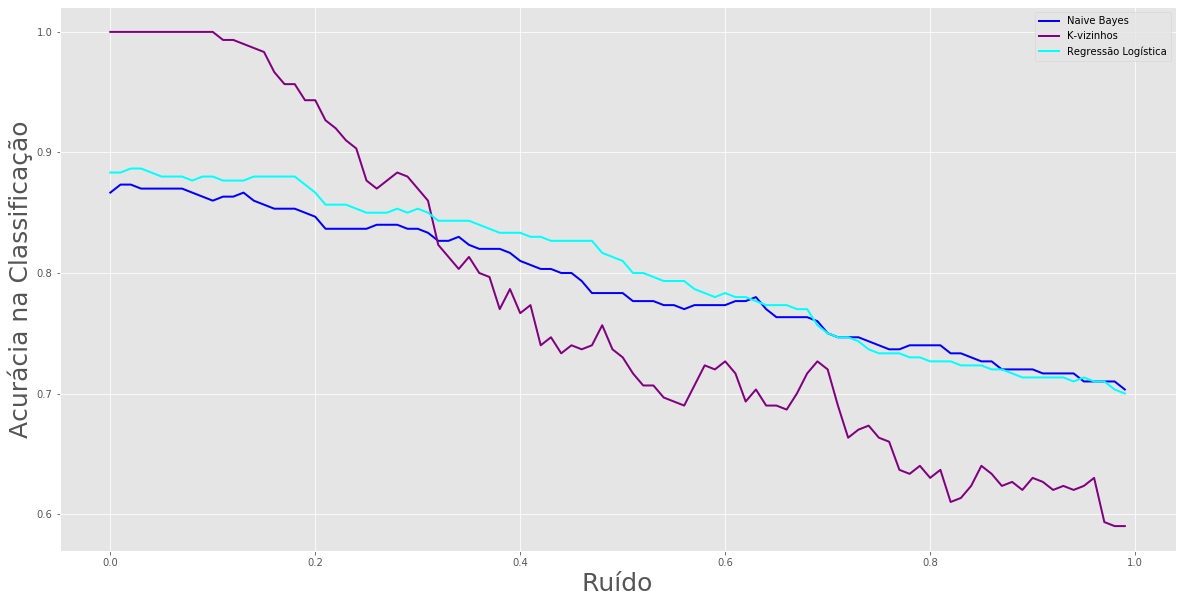

In [10]:
plt.style.use('ggplot')

plt.figure(figsize=(20,10))
plt.plot(noise, score1, linestyle='-', color="blue", linewidth=2,label = 'Naive Bayes')
plt.plot(noise, score2, linestyle='-', color="purple", linewidth=2,label = 'K-vizinhos')
plt.plot(noise, score3, linestyle='-', color="cyan", linewidth=2,label = 'Regressão Logística')
plt.ylabel("Acurácia na Classificação", fontsize=25)
plt.xlabel("Ruído", fontsize=25)
plt.legend()
plt.show(True)

### <a name="ex7"></a> 7 - Considerando os dados do código anterior, compare os algoritmos: árvores de decisão, forestas aleatórias e bagging. Use o método selection.GridSearchCV da biblioteca sciki-learn para determinar os melhores parâmetros dos modelos.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

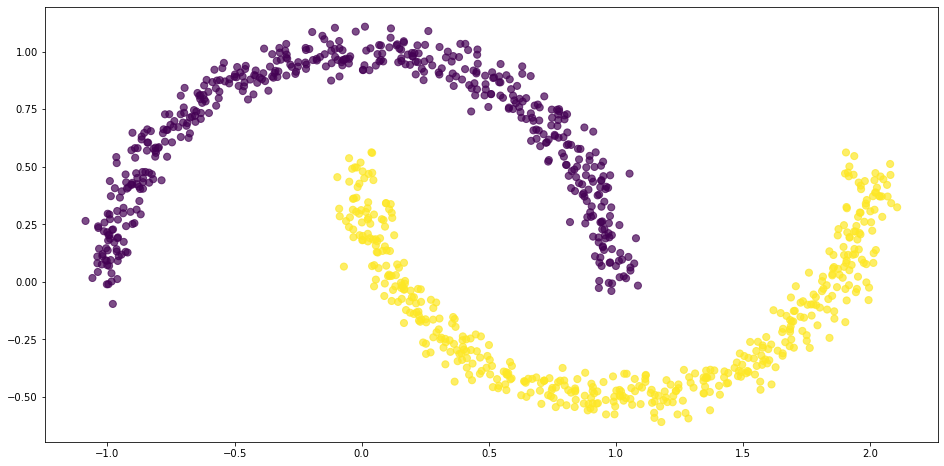

In [2]:
plt.figure(figsize=(16,8))
n_samples = 1000
data  = datasets.make_moons(n_samples=n_samples, noise=0.05)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)

Árvore de Decisão

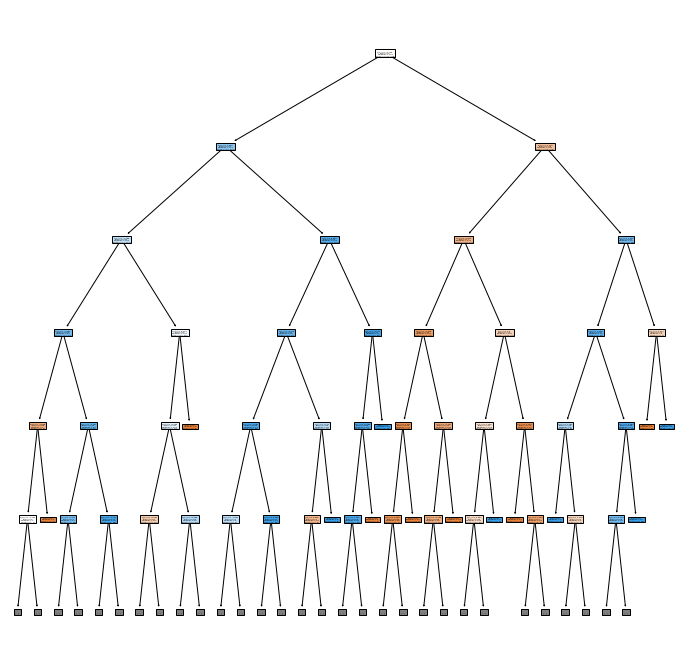

In [7]:
from sklearn import tree

#gerar os dados
n_samples = 1000
noise = np.arange(0,1,0.01)
score1 = [] 
ex = DecisionTreeClassifier()

for i in noise:
    np.random.seed(50)
    data = datasets.make_moons(n_samples=n_samples, noise=i)
    X = data[0]
    y = data[1]
    scaler = StandardScaler().fit(X) #padronizar os dados
    X = scaler.transform(X)
    p = 0.7 
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 25)
    X_train.shape,X_test.shape # Verificando as formas dos dados
    model = DecisionTreeClassifier() #ajusta o modelo de arvore de decisão
    model.fit(X_train,y_train) # Treinando o modelo de arvore de decisão
    ex = model

    y_pred = model.predict(X_test)
    score1.append(model.score(X_test, y_test))


plt.figure(figsize=(12, 12))
out = tree.plot_tree(model, max_depth = 5, filled = True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)

Floresta Aletória

In [78]:
#gerar os dados
n_samples = 1000
noise = np.arange(0,1,0.01)
score2 = [] 
for i in noise:
    np.random.seed(50)
    data = datasets.make_moons(n_samples=n_samples, noise=i)
    X = data[0]
    y = data[1]
    scaler = StandardScaler().fit(X) #padronizar os dados
    X = scaler.transform(X)
    p = 0.7 
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 25)
    X_train.shape,X_test.shape # Verificando as formas dos dados
    model = RandomForestClassifier() #ajusta o modelo de arvore de decisão
    model.fit(X_train,y_train) # Treinando o modelo de arvore de decisão
    y_pred = model.predict(X_test)
    score2.append(model.score(X_test, y_test))

Bagging

In [80]:
#gerar os dados
n_samples = 1000
noise = np.arange(0,1,0.01)
score3 = []
for i in noise:
    np.random.seed(50)
    data = datasets.make_moons(n_samples=n_samples, noise=i)
    X = data[0]
    y = data[1]
    scaler = StandardScaler().fit(X) #padronizar os dados
    X = scaler.transform(X)
    p = 0.7 
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 25)
    X_train.shape,X_test.shape # Verificando as formas dos dados
    model = BaggingClassifier() #ajusta o modelo bagging
    model.fit(X_train,y_train) # Treinando o modelo bagging
    y_pred = model.predict(X_test)
    score3.append(model.score(X_test, y_test))

In [73]:
print("Acurácia Árvore de Decisão: Máxima:",np.max(score1)," Mínima:",np.min(score1))
print("Acurácia Floresta Aletória: Máxima:",np.max(score2)," Mínima:",np.min(score2))
print("Acurácia Bagging: Máxima:",np.max(score3)," Mínima:",np.min(score3))

Acurácia Arvore de Decisão: Máxima: 1.0  Mínima: 0.5866666666666667
Acurácia Floresta Aletória: Máxima: 1.0  Mínima: 0.6133333333333333
Acurácia Bagging: Máxima: 1.0  Mínima: 0.6233333333333333


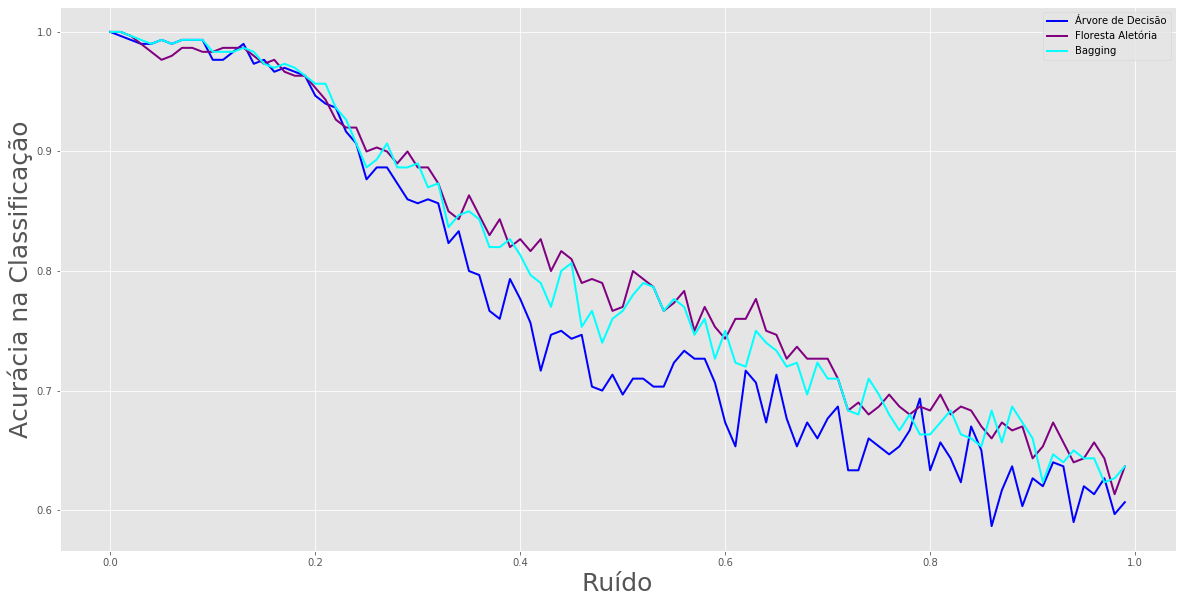

In [77]:
plt.style.use('ggplot')

plt.figure(figsize=(20,10))
plt.plot(noise, score1, linestyle='-', color="blue", linewidth=2,label = 'Árvore de Decisão')
plt.plot(noise, score2, linestyle='-', color="purple", linewidth=2,label = 'Floresta Aletória')
plt.plot(noise, score3, linestyle='-', color="cyan", linewidth=2,label = 'Bagging')
plt.ylabel("Acurácia na Classificação", fontsize=25)
plt.xlabel("Ruído", fontsize=25)
plt.legend()
plt.show(True)